#1. Import Pycaret

In [1]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'3.3.2'

#2. Import Library

In [3]:
import pandas as pd
from pycaret.classification import *

#3. Import Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_bugzilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/bugzilla.csv'
#path_columba = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/columba.csv'
#path_jdt = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/jdt.csv'
#path_mozilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/mozilla.csv'
#path_platform = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/platform.csv'
#path_postgres = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/postgres.csv'

df = pd.read_csv(path_bugzilla)
#df = pd.read_csv(path_columba)
#df = pd.read_csv(path_jdt)
#df = pd.read_csv(path_mozilla)
#df = pd.read_csv(path_platform)
#df = pd.read_csv(path_postgres)

#4. Preprocessing

In [7]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,3,2001/12/12 17:41,1,1,3,0.579380,0.093620,0.000000,480.666667,1,14,596,0.666667,143,133.50,129,1
1,7,1999/10/12 12:57,1,1,1,0.000000,0.000000,0.000000,398.000000,1,1,0,1.000000,140,140.00,137,1
2,8,2002/5/15 16:55,3,3,52,0.739279,0.183477,0.208913,283.519231,0,23,15836,0.750000,984,818.65,978,0
3,9,2002/1/21 15:37,1,1,8,0.685328,0.016039,0.012880,514.375000,1,21,1281,1.000000,579,479.25,550,0
4,10,2001/12/19 16:44,2,2,38,0.769776,0.091829,0.072746,366.815789,1,21,6565,0.763158,413,313.25,405,0


In [8]:
# Menghapus kolom yang tidak dibutuhkan
df_stats = df.drop(columns=['transactionid', 'commitdate'])

# Menghitung statistik deskriptif
df_stats.describe()




,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
count,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000
mean,1.169913,1.220346,2.287662,0.229153,0.071410,3.113758,591.379777,0.859957,16.424892,173.927922,0.952656,342.570563,253.033361,230.821429,0.367100
std,0.424315,0.569805,4.275243,0.371861,0.491756,198.624600,547.895977,0.347070,10.743430,646.256119,0.137676,392.273355,268.292945,269.729476,0.482066
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.037037,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.003093,0.001295,210.000000,1.000000,7.000000,3.000000,1.000000,58.000000,52.000000,35.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.009909,0.005109,455.000000,1.000000,16.000000,20.000000,1.000000,196.000000,156.000000,129.500000,0.000000
75%,1.000000,1.000000,2.000000,0.551098,0.035356,0.017502,799.250000,1.000000,24.000000,119.000000,1.000000,489.000000,352.000000,341.250000,1.000000
max,4.000000,8.000000,63.000000,1.000000,21.000000,13495.000000,2751.000000,1.000000,47.000000,15836.000000,1.000000,1815.000000,1042.750000,1741.000000,1.000000


In [9]:
df['ns'].unique()

array([1, 3, 2, 4])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


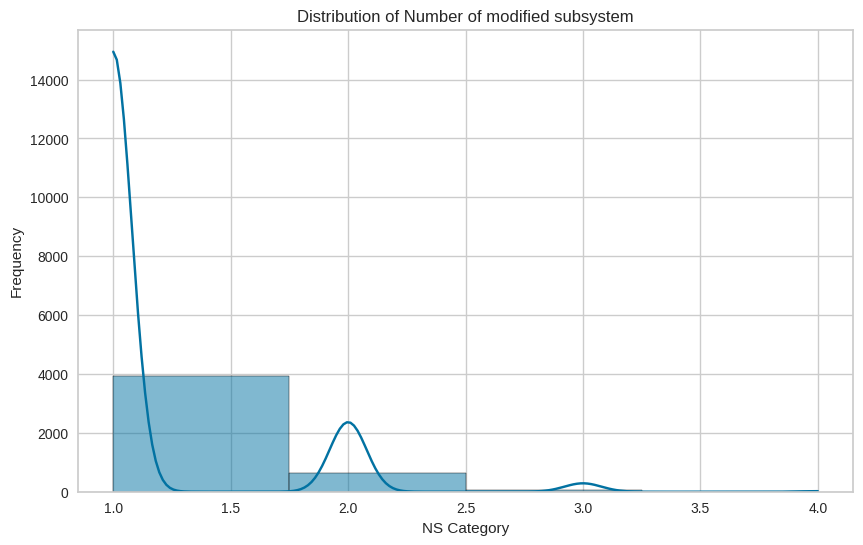

In [11]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ns'], kde=True, color="b", bins=4)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified subsystem')
plt.xlabel('NS Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [12]:
df['nm'].unique()

array([1, 3, 2, 4, 5, 6, 8, 7])

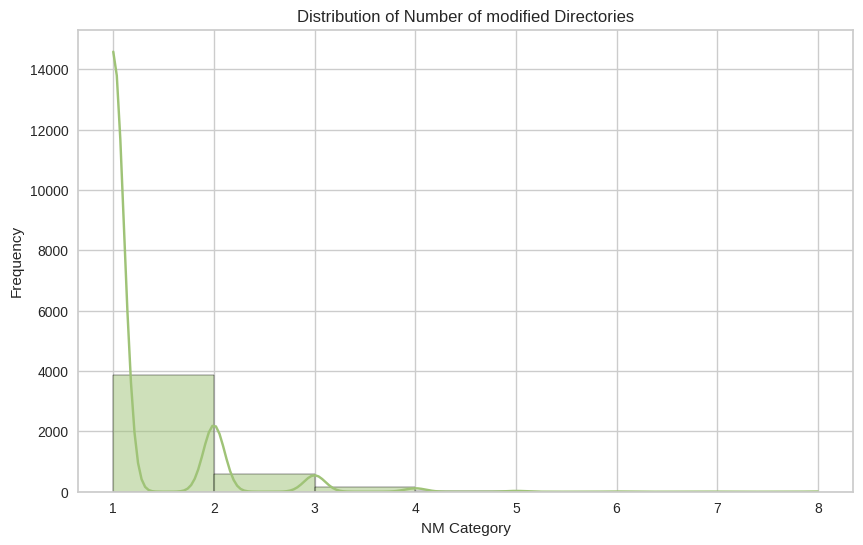

In [13]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nm'], kde=True, color="g", bins=7)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Directories')
plt.xlabel('NM Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [14]:
df['nf'].unique()

array([ 3,  1, 52,  8, 38, 16, 33,  9, 10, 63, 41, 21, 12, 22,  2,  7,  4,
        5, 11, 36, 30, 40,  6, 18, 15, 14, 29, 31, 43, 17, 20, 25, 23, 24,
       19, 27, 49, 61, 50, 46, 28, 13, 53, 57, 55, 44, 34])

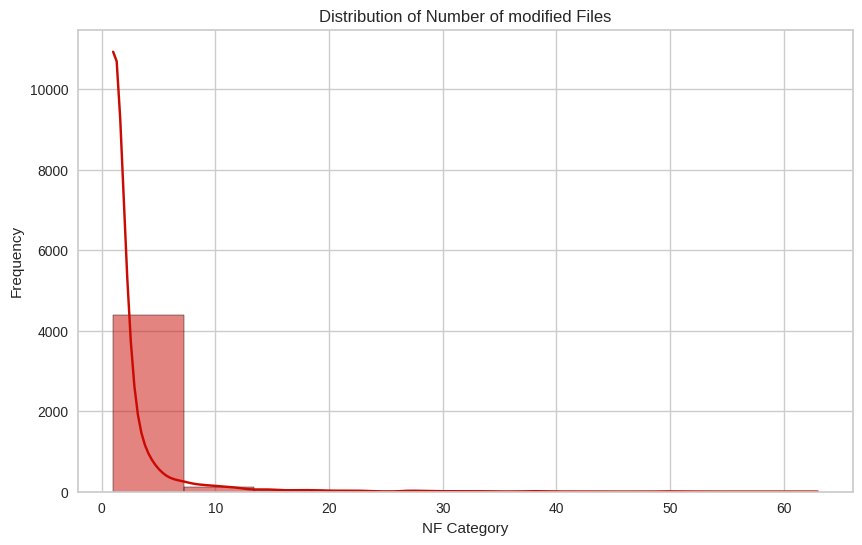

In [15]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nf'], kde=True, color="r", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Files')
plt.xlabel('NF Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [16]:
df['entropy'].unique()

array([0.57938016, 0.        , 0.73927942, 0.68532759, 0.76977615,
       0.76077716, 0.81616032, 0.65024161, 0.79589535, 0.87390809,
       0.76102448, 0.99530485, 0.77009715, 0.8004176 , 0.80037914,
       0.61477403, 0.81571473, 0.9140542 , 1.        , 0.80375628,
       0.82501121, 0.94639463, 0.55205273, 0.66268152, 0.78036866,
       0.90742103, 0.72540551, 0.01406041, 0.84405648, 0.79634314,
       0.81598795, 0.75907253, 0.83728278, 0.62292414, 0.52572051,
       0.47701643, 0.84687798, 0.8296547 , 0.78730588, 0.35335933,
       0.74386892, 0.66008551, 0.88685951, 0.85966105, 0.56020181,
       0.99941106, 0.57931871, 0.63314182, 0.93831535, 0.65670455,
       0.39393124, 0.62863456, 0.91401851, 0.61846769, 0.74311034,
       0.94220777, 0.99777247, 0.89651116, 0.9612366 , 0.91829583,
       0.84535094, 0.97095059, 0.78239414, 0.83069675, 0.586405  ,
       0.8118365 , 0.14826045, 0.68813958, 0.76058971, 0.89532974,
       0.34781691, 0.95968689, 0.77250689, 0.72192809, 0.79164

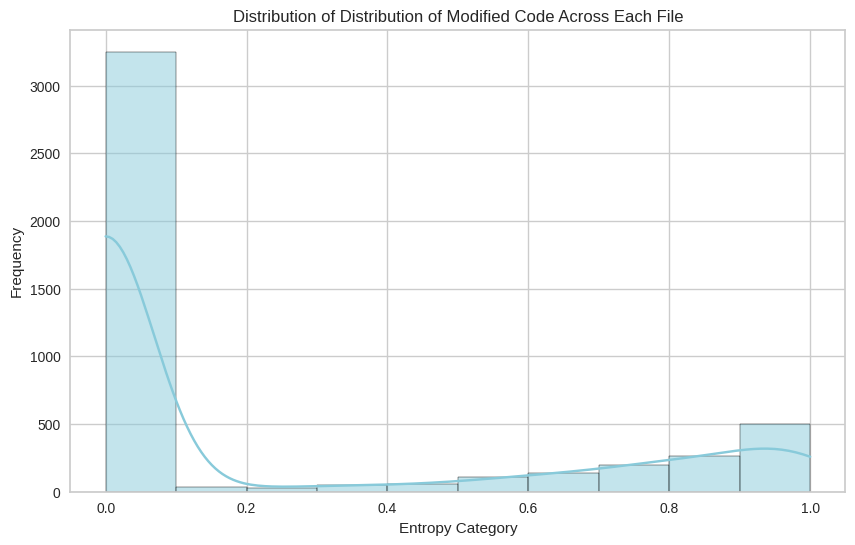

In [17]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['entropy'], kde=True, color="c", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Distribution of Modified Code Across Each File')
plt.xlabel('Entropy Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [18]:
df['la'].unique()

array([0.09361997, 0.        , 0.1834769 , ..., 0.31847134, 0.13245033,
       0.02569832])

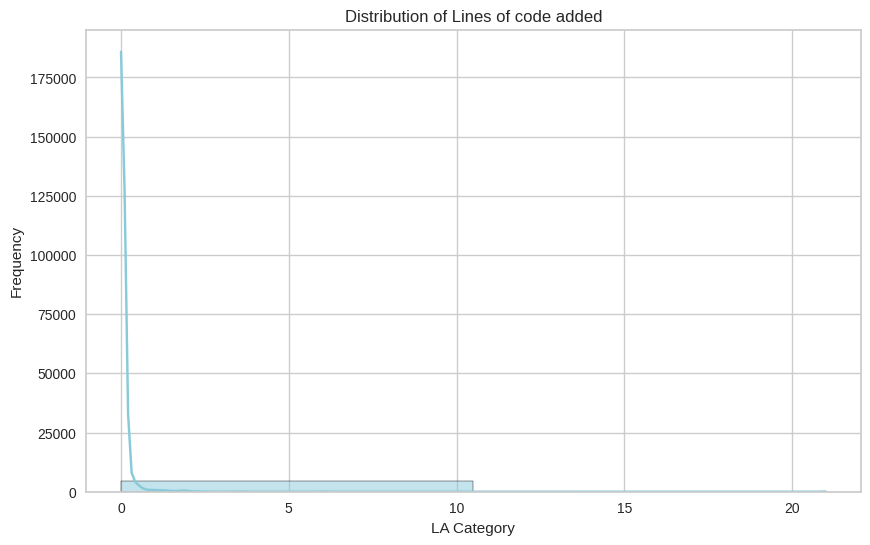

In [19]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['la'], kde=True, color="c", bins=2)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code added')
plt.xlabel('LA Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [20]:
df['ld'].unique()

array([0.00000000e+00, 2.08912704e-01, 1.28797080e-02, ...,
       2.64900660e-02, 3.91061450e-02, 4.20000000e+01])

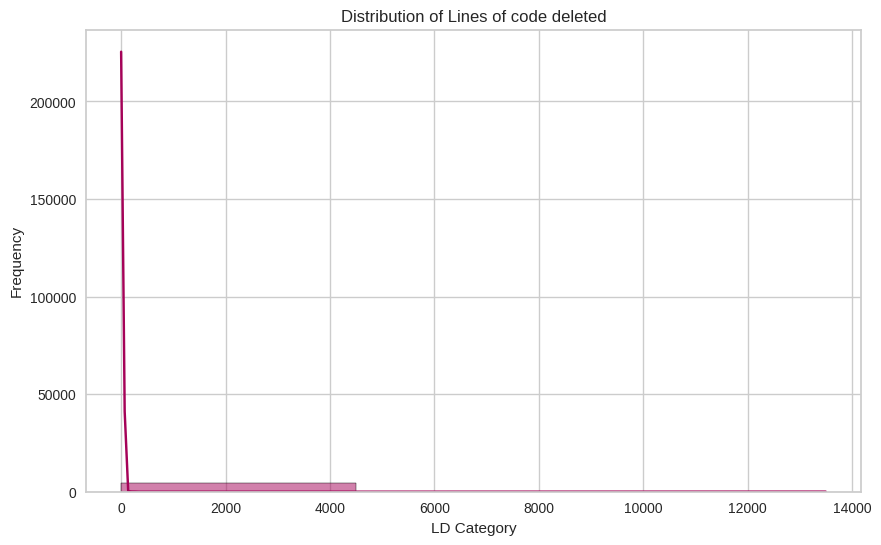

In [21]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ld'], kde=True, color="m", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code deleted')
plt.xlabel('LD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [22]:
df['lt'].unique()

array([480.6666667, 398.       , 283.5192308, ..., 798.1428571,
       183.5      ,   2.       ])

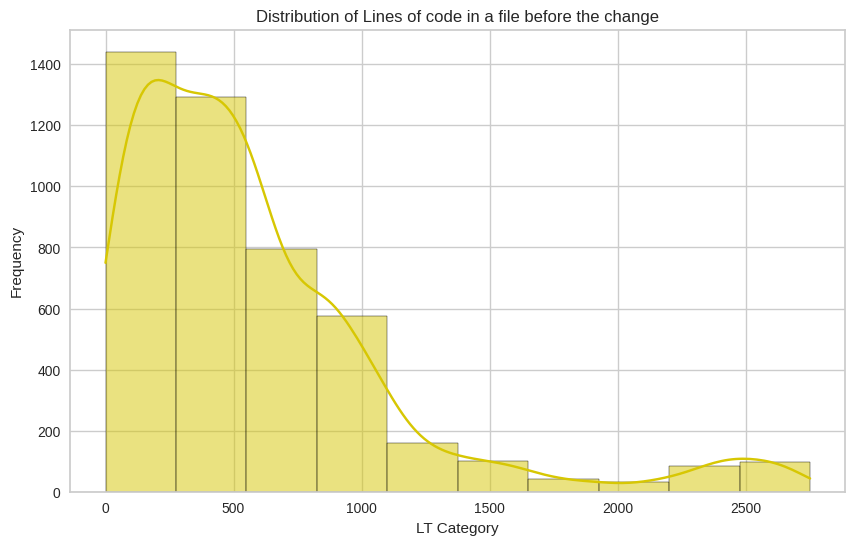

In [23]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['lt'], kde=True, color="y", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code in a file before the change')
plt.xlabel('LT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [24]:
df['fix'].unique()

array([1, 0])

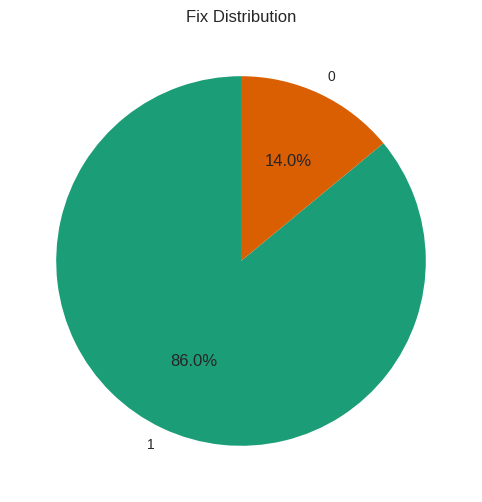

In [25]:
a=df['fix'].value_counts()

# Membuat pie diagram
plt.figure(figsize=(8, 6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'), startangle=90)

# Menambahkan judul
plt.title('Fix Distribution')

# Menampilkan plot
plt.show()

In [26]:
df['ndev'].unique()

array([14,  1, 23, 21, 20, 19, 27,  9, 26,  6, 22, 15, 25, 13, 24,  2, 12,
       32, 39, 36, 18, 11, 10, 35,  8,  5, 29,  3, 30, 28, 34, 31, 33, 17,
       16,  7,  4, 40, 38, 46, 37, 44, 41, 47, 43, 42, 45])

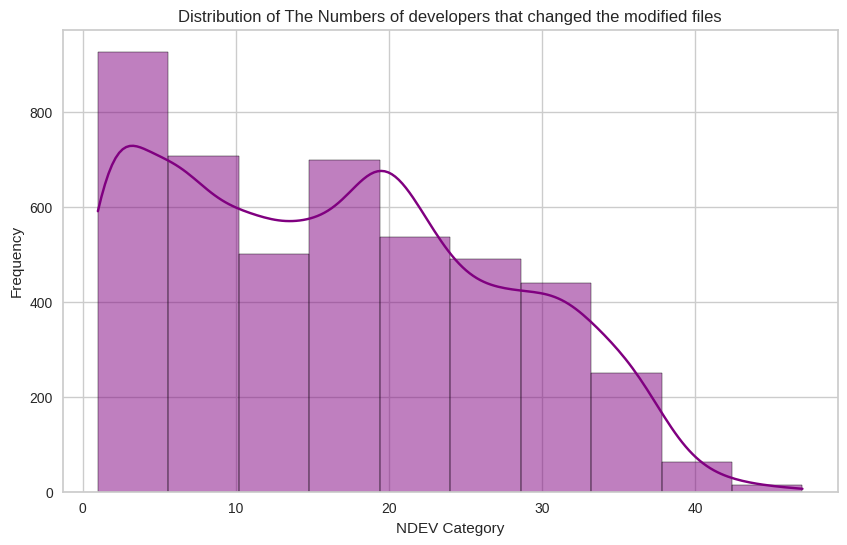

In [27]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ndev'], kde=True, color="purple", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of The Numbers of developers that changed the modified files')
plt.xlabel('NDEV Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [28]:
df['pd'].unique()

array([  596,     0, 15836,  1281,  6565,  2098,  6840,  2117,   794,
          39,   172,  3520,    42, 10034,  2739,  3724,  4898,  9020,
          86,   256,   134,    36,    78,   130,    24,   171,  3580,
         729,    12,    18,    38,    30,    28,    16,    14,  1216,
        7435,  4763,  7152,  1080,   430,   514,  1733,   660,   226,
         699,  1507,    56,   265,    88,    32,     8,     4,     2,
           9,     6,     7,   346,   176,    13,   119,   200,    35,
         693,     3,   281,    25,   373,   214,   164,   486,    79,
         307,   106,    82,   103,    10,    23,  1270,    98,   609,
         174,    68,   122,   138,     1,  1464,   322,    43,    15,
          77,    75,    76,   112,   144,   167,     5,   105,    40,
         706,    52,   115,   254,    57,    11,   166,    85,    20,
          49,    81,   625,   253,    34,   270,  1164,   186,    26,
         137,  3412,    48,    44,   489,    53,    21,    17,   565,
          66,    27,

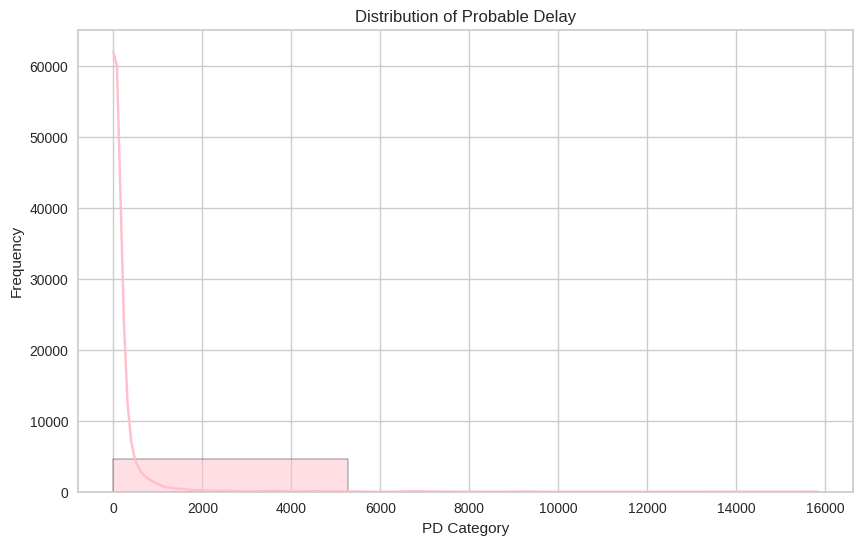

In [29]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="pink", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Probable Delay')
plt.xlabel('PD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [30]:
df['npt'].unique()

array([0.66666667, 1.        , 0.75      , 0.76315789, 0.72727273,
       0.55555556, 0.875     , 0.33333333, 0.6       , 0.6031746 ,
       0.73170732, 0.71428571, 0.5       , 0.86363636, 0.57142857,
       0.85714286, 0.84210526, 0.8       , 0.69444444, 0.7       ,
       0.77777778, 0.83333333, 0.9       , 0.80952381, 0.40909091,
       0.91666667, 0.61111111, 0.4       , 0.45454545, 0.78571429,
       0.79310345, 0.88888889, 0.42857143, 0.2       , 0.92857143,
       0.41935484, 0.72093023, 0.63636364, 0.11764706, 0.6875    ,
       0.64      , 0.73913043, 0.89473684, 0.86666667, 0.81481481,
       0.72222222, 0.69387755, 0.25      , 0.61904762, 0.36065574,
       0.69565217, 0.38888889, 0.63043478, 0.82352941, 0.92307692,
       0.03703704, 0.74074074, 0.34      , 0.95      , 0.375     ,
       0.91304348, 0.11111111, 0.32075472, 0.58823529, 0.86842105,
       0.05263158, 0.46153846, 0.69230769, 0.70909091, 0.81818182,
       0.94117647, 0.125     , 0.68181818, 0.52631579, 0.16666

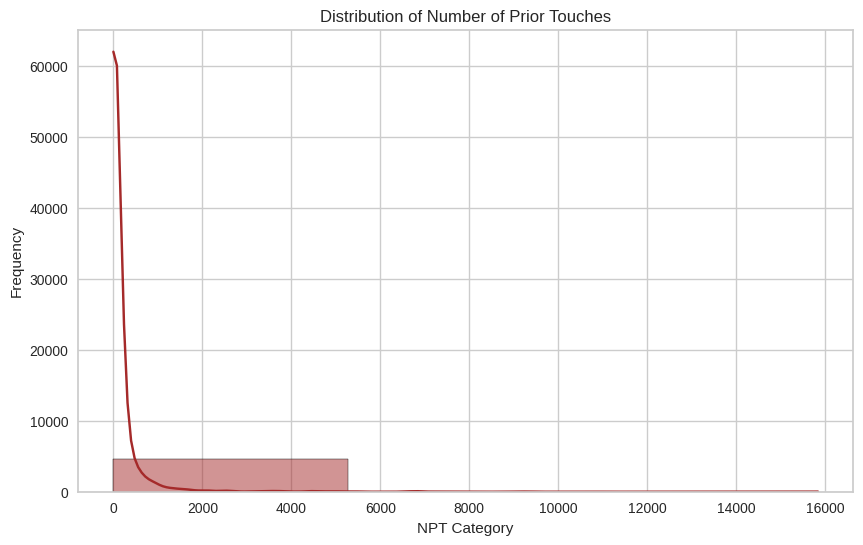

In [31]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="brown", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of Prior Touches')
plt.xlabel('NPT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

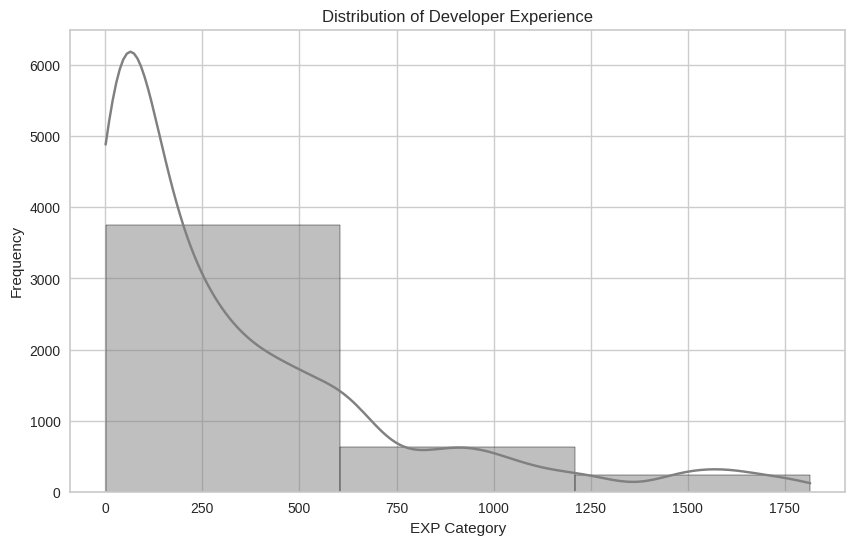

In [32]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['exp'], kde=True, color="gray", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience')
plt.xlabel('EXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

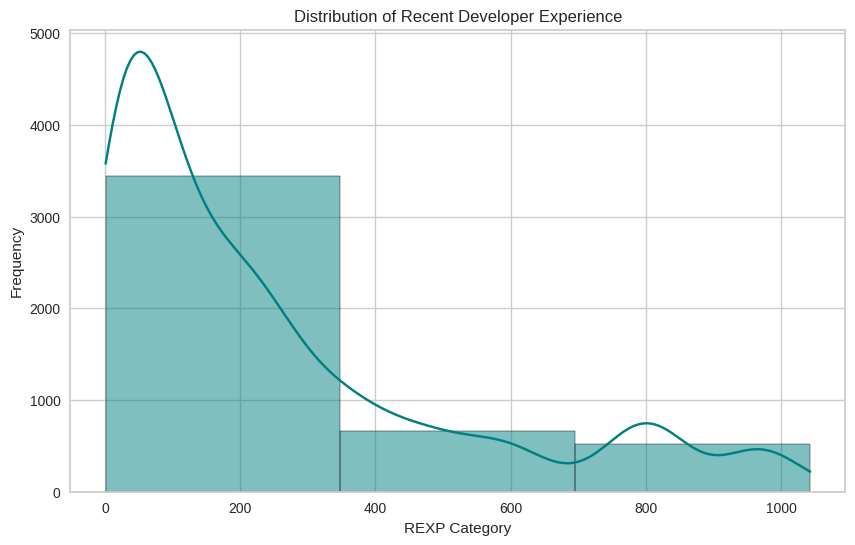

In [33]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['rexp'], kde=True, color="teal", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Recent Developer Experience')
plt.xlabel('REXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

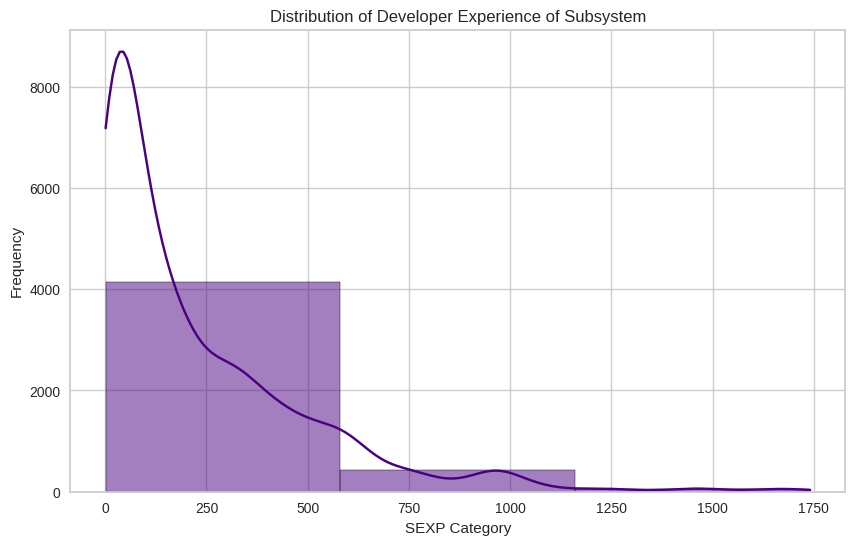

In [34]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['sexp'], kde=True, color="indigo", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience of Subsystem')
plt.xlabel('SEXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

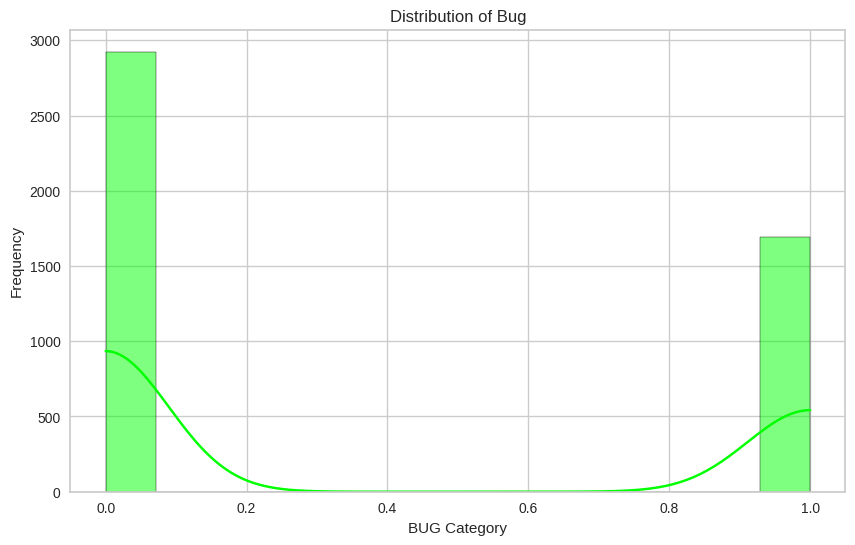

In [35]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['bug'], kde=True, color="lime")

# Menambahkan judul dan label sumbu
plt.title('Distribution of Bug')
plt.xlabel('BUG Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  4620 non-null   int64  
 1   commitdate     4620 non-null   object 
 2   ns             4620 non-null   int64  
 3   nm             4620 non-null   int64  
 4   nf             4620 non-null   int64  
 5   entropy        4620 non-null   float64
 6   la             4620 non-null   float64
 7   ld             4620 non-null   float64
 8   lt             4620 non-null   float64
 9   fix            4620 non-null   int64  
 10  ndev           4620 non-null   int64  
 11  pd             4620 non-null   int64  
 12  npt            4620 non-null   float64
 13  exp            4620 non-null   int64  
 14  rexp           4620 non-null   float64
 15  sexp           4620 non-null   int64  
 16  bug            4620 non-null   int64  
dtypes: float64(6), int64(10), object(1)
memory usage: 61

In [37]:
df.isna().sum()

,0
transactionid,0
commitdate,0
ns,0
nm,0
nf,0
entropy,0
la,0
ld,0
lt,0
fix,0


In [38]:
df.drop(['transactionid', 'commitdate'], axis=1, inplace=True)
df.head()

,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,1,1,3,0.579380,0.093620,0.000000,480.666667,1,14,596,0.666667,143,133.50,129,1
1,1,1,1,0.000000,0.000000,0.000000,398.000000,1,1,0,1.000000,140,140.00,137,1
2,3,3,52,0.739279,0.183477,0.208913,283.519231,0,23,15836,0.750000,984,818.65,978,0
3,1,1,8,0.685328,0.016039,0.012880,514.375000,1,21,1281,1.000000,579,479.25,550,0
4,2,2,38,0.769776,0.091829,0.072746,366.815789,1,21,6565,0.763158,413,313.25,405,0


In [39]:
df['bug'].value_counts()

,count
bug,
0,2924
1,1696


#4. Training

In [40]:
clf = setup(
    data=df,
    target='bug',
    session_id=101,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    fold=10,
    verbose=True
)

,Description,Value
0,Session id,101
1,Target,bug
2,Target type,Binary
3,Original data shape,"(4620, 15)"
4,Transformed data shape,"(5480, 15)"
5,Transformed train set shape,"(4094, 15)"
6,Transformed test set shape,"(1386, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [42]:
# 6. Bandingkan semua model dan ambil model terbaik
best_model = compare_models(sort='Accuracy', exclude=['dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7567,0.8213,0.6462,0.6771,0.6607,0.4713,0.4721,2.1330
rf,Random Forest Classifier,0.7529,0.8050,0.6260,0.6780,0.6497,0.4596,0.4616,1.3880
gbc,Gradient Boosting Classifier,0.7452,0.8157,0.6521,0.6536,0.6528,0.4516,0.4517,1.1990
xgboost,Extreme Gradient Boosting,0.7440,0.8087,0.6345,0.6585,0.6452,0.4453,0.4463,0.4530
ada,Ada Boost Classifier,0.7421,0.7921,0.6698,0.6442,0.6562,0.4502,0.4508,0.3180
et,Extra Trees Classifier,0.7421,0.7897,0.6134,0.6610,0.6355,0.4366,0.4380,0.5180
ridge,Ridge Classifier,0.6852,0.7387,0.6142,0.5671,0.5891,0.3349,0.3361,0.0520
lda,Linear Discriminant Analysis,0.6852,0.7387,0.6142,0.5671,0.5891,0.3349,0.3361,0.0510
dt,Decision Tree Classifier,0.6799,0.6637,0.6024,0.5598,0.5794,0.3219,0.3233,0.0820
lr,Logistic Regression,0.6707,0.7619,0.7052,0.5400,0.6113,0.3345,0.3438,0.3940


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [47]:
lightgbm= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8360,0.6303,0.6881,0.6579,0.4727,0.4738
1,0.7377,0.8070,0.6303,0.6466,0.6383,0.4325,0.4326
2,0.7654,0.8249,0.6639,0.6870,0.6752,0.4917,0.4919
3,0.7562,0.8279,0.6723,0.6667,0.6695,0.4763,0.4763
4,0.7430,0.7942,0.6695,0.6423,0.6556,0.4508,0.4511
5,0.7152,0.7926,0.5847,0.6161,0.6000,0.3791,0.3794
6,0.7957,0.8656,0.7373,0.7131,0.7250,0.5625,0.5627
7,0.7616,0.8162,0.6134,0.7019,0.6547,0.4739,0.4764
8,0.7771,0.8399,0.6387,0.7238,0.6786,0.5090,0.5113


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
rf= create_model('rf')
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8104,0.6303,0.7282,0.6757,0.5080,0.5111
1,0.7654,0.7988,0.6218,0.7048,0.6607,0.4825,0.4847
2,0.7469,0.8268,0.6050,0.6729,0.6372,0.4437,0.4452
3,0.7654,0.8147,0.6303,0.7009,0.6637,0.4844,0.4860
4,0.7585,0.7915,0.7373,0.6493,0.6905,0.4938,0.4965
5,0.7245,0.7913,0.5678,0.6381,0.6009,0.3916,0.3931
6,0.7399,0.8254,0.6610,0.6393,0.6500,0.4432,0.4434
7,0.7430,0.7880,0.5630,0.6837,0.6175,0.4268,0.4313
8,0.7740,0.8166,0.6555,0.7091,0.6812,0.5066,0.5075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7685,0.8275,0.6303,0.7075,0.6667,0.4903,0.4922
1,0.7377,0.7968,0.5882,0.6604,0.6222,0.4223,0.4240
2,0.7685,0.8333,0.6471,0.7000,0.6725,0.4939,0.4948
3,0.7593,0.8121,0.6303,0.6881,0.6579,0.4727,0.4738
4,0.7430,0.8045,0.6949,0.6357,0.6640,0.4566,0.4578
5,0.7214,0.8031,0.6017,0.6228,0.6121,0.3948,0.3949
6,0.7647,0.8376,0.7203,0.6641,0.6911,0.5016,0.5026
7,0.7616,0.8221,0.6050,0.7059,0.6516,0.4720,0.4753
8,0.7802,0.8419,0.6134,0.7449,0.6728,0.5096,0.5151


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [49]:
gbc= create_model('gbc')
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7346,0.8212,0.6218,0.6435,0.6325,0.4248,0.4250
1,0.7191,0.7828,0.6303,0.6148,0.6224,0.3989,0.3990
2,0.7809,0.8288,0.6891,0.7069,0.6979,0.5260,0.5261
3,0.7407,0.8147,0.6471,0.6471,0.6471,0.4422,0.4422
4,0.7214,0.7863,0.6441,0.6129,0.6281,0.4055,0.4059
5,0.7337,0.8079,0.6441,0.6333,0.6387,0.4279,0.4279
6,0.7864,0.8523,0.7119,0.7059,0.7089,0.5402,0.5402
7,0.7616,0.8355,0.6639,0.6810,0.6723,0.4850,0.4851
8,0.7492,0.8286,0.6471,0.6638,0.6553,0.4583,0.4584


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7469,0.8164,0.6218,0.6667,0.6435,0.4477,0.4483
1,0.7253,0.7772,0.6050,0.6316,0.6180,0.4037,0.4039
2,0.7685,0.8327,0.6723,0.6897,0.6809,0.4993,0.4994
3,0.7438,0.8045,0.6218,0.6607,0.6407,0.4419,0.4424
4,0.7368,0.7859,0.6610,0.6341,0.6473,0.4376,0.4378
5,0.7152,0.8047,0.5593,0.6226,0.5893,0.3722,0.3735
6,0.7771,0.8597,0.7119,0.6885,0.7000,0.5227,0.5229
7,0.7616,0.8263,0.6218,0.6981,0.6578,0.4758,0.4777
8,0.7895,0.8384,0.6387,0.7525,0.6909,0.5329,0.5370


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
voting_model = blend_models(estimator_list=[lightgbm, tuned_rf, tuned_gbc], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7531,0.8325,0.6303,0.6757,0.6522,0.4611,0.4618
1,0.7623,0.8007,0.6387,0.6909,0.6638,0.4804,0.4813
2,0.7716,0.8378,0.6555,0.7027,0.6783,0.5016,0.5023
3,0.7593,0.8228,0.6387,0.6847,0.6609,0.4746,0.4753
4,0.7585,0.7992,0.6780,0.6667,0.6723,0.4811,0.4812
5,0.7245,0.8059,0.5932,0.6306,0.6114,0.3982,0.3987
6,0.7864,0.8630,0.7119,0.7059,0.7089,0.5402,0.5402
7,0.7647,0.8252,0.6050,0.7129,0.6545,0.4779,0.4816
8,0.7802,0.8473,0.6387,0.7308,0.6816,0.5149,0.5176


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [51]:
# 7. Finalisasi model terbaik
final_model = finalize_model(voting_model)

In [52]:
# 8. Evaluasi model dengan berbagai plot
evaluate_model(final_model)  # akan menampilkan GUI dengan berbagai evaluasi (ROC, Confusion Matrix, dll)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
# 9. Simpan model ke Google Drive
model_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/Cross Project Defect Prediction/Model/bugzilla_best_model'
save_model(final_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ns', 'nm', 'nf', 'entropy', 'la',
                                              'ld', 'lt', 'fix', 'ndev', 'pd',
                                              'npt', 'exp', 'rexp', 'sexp'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer'...
                                                                           max_features='log2',
